In [ ]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree))
width = u.Quantity(0.1, u.deg)
height = u.Quantity(0.1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
planet_location = EarthLocation(lat=45*u.deg, lon=120*u.deg, height=0*u.m)

In [ ]:
obstime = Time.now()

In [ ]:
azimuths = []
altitudes = []

In [ ]:
for star in r:
    star_location = SkyCoord(ra=star['ra'], dec=star['dec'], unit=(u.degree, u.degree))
    star_altaz = star_location.transform_to(AltAz(obstime=obstime, location=planet_location))
    azimuths.append(star_altaz.az)
    altitudes.append(star_altaz.alt)

In [ ]:
r['azimuth'] = azimuths
r['altitude'] = altitudes

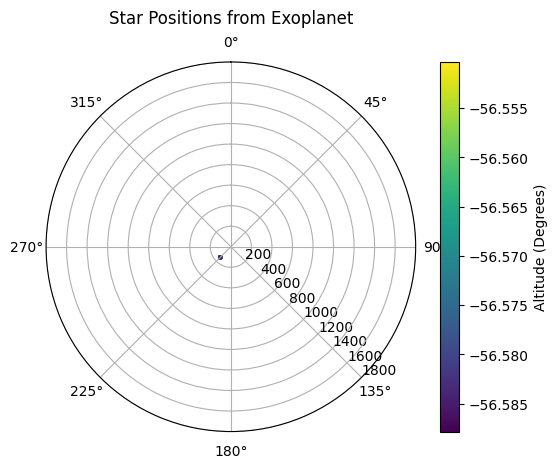

In [ ]:
azimuth_rad = np.radians(r['azimuth'])
altitude_deg = r['altitude']
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
altitude_inverted = 90 - altitude_deg
scatter = ax.scatter(azimuth_rad, altitude_inverted, c=altitude_deg, cmap='viridis', s=5)
cbar = plt.colorbar(scatter)
cbar.set_label('Altitude (Degrees)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_ylim(0, 1800)
ax.set_rlabel_position(135)
ax.set_title('Star Positions from Exoplanet', va='bottom')

plt.show()